In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Datasets/patient_reviews.csv')
df

,index,rating,reviews,doctor_id,sentiment
0,0,1,"In my mother, an insufficient diagnosis was ma...",138,-1
1,1,6,Was very too peace from the start with Dr.Bröc...,117,1
2,2,6,I have been regularly in treatment since 2010....,125,1
3,3,1,For a long time I have had pain that radiates ...,96,-1
4,4,6,I came to this clinic through this page.I can ...,100,1
...,...,...,...,...,...
92488,92488,2,The anamnesis interview felt more like an inte...,149,-1
92489,92489,1,For the first and last time I was in treatment...,146,-1
92490,92490,6,"Very personable and understanding, you can dis...",147,1
92491,92491,5,Dr.Karajoli was the first pediatrician to take...,41,1


In [3]:
df.isna().sum()

index        0
rating       0
reviews      0
doctor_id    0
sentiment    0
dtype: int64

In [4]:
X = df.reviews
y = df.sentiment

In [5]:
# df['reviews'] = df['reviews'].str.replace('<.*?>', '')

In [6]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [7]:
lemma = WordNetLemmatizer()
corpus = []
for i in range(0, len(df)):
    review = re.sub(r'<[^>]+>', '', df['reviews'][i])
    review = re.sub('[^a-zA-Z0-9]', ' ',df['reviews'][i]) ## remove non alphanumeric characters
    review = review.lower()
    review = review.split()
    
    review = [lemma.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [8]:
df.reviews[0],corpus[0]

('In my mother, an insufficient diagnosis was made, insufficiently treated, held up for weeks.When the correct diagnosis (and that was not the merit of Mr. Glaser) was finally clear and the complicated operation was carried out, it was already weakened.',
 'mother insufficient diagnosis made insufficiently treated held week correct diagnosis merit mr glaser finally clear complicated operation carried already weakened')

In [9]:
np.save('corpus.npy',corpus)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=4000, stop_words='english')

In [11]:
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

In [12]:
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_values = tfidf_matrix.toarray()

In [13]:
tfidf_values,feature_names

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array(['00', '000', '02', ..., 'zack', 'zero', 'zimmermann'], dtype=object))

## importing needed libraries

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns

In [27]:
#train test split for training and analysing

X_train, X_test, y_train, y_test = train_test_split(tfidf_values,y,test_size=.3, random_state=42)
len(X_train),len(X_test)
y_train

52950    1
12681    1
52817    1
43956    1
5421     1
        ..
6265     1
54886    1
76820    1
860      1
15795    1
Name: sentiment, Length: 64745, dtype: int64

## Naive Bayes

In [16]:
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()

In [17]:
naive.fit(X_train, y_train)
naive_pred = naive.predict(X_test)
naive_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

### Accuracy of Naive Bayes

In [18]:
naive_score = accuracy_score(naive_pred,y_test)
naive_score

0.8805319302292057

### Confusion Matrix of Naive Bayes

Text(0.5, 1.0, 'Confusion Matrix')

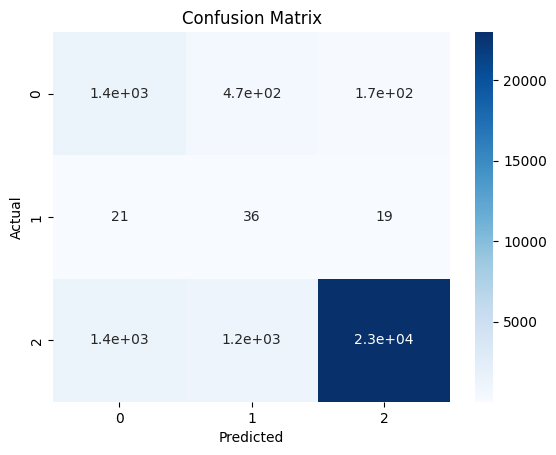

In [19]:
naive_metrics = confusion_matrix(naive_pred, y_test,labels=None, sample_weight=None, normalize=None)
sns.heatmap(naive_metrics, annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

## Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
random = RandomForestClassifier(criterion = 'gini', max_depth= 100, min_samples_leaf= 10, min_samples_split= 40)
random.fit(X_train, y_train)
random_pred = random.predict(X_test)
random_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

### Accuracy of Random Forest

In [22]:
random_score = accuracy_score(random_pred,y_test)
random_score

0.8578636298111576

### Confusion Matrix of Random Forest

Text(0.5, 1.0, 'Confusion Matrix')

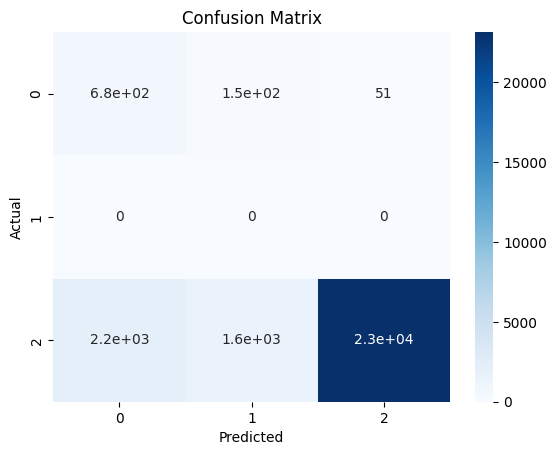

In [23]:
random_metrics = confusion_matrix(random_pred, y_test,labels=None, sample_weight=None, normalize=None)
sns.heatmap(random_metrics, annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

## Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train,y_train)
logistic_pred = logistic.predict(X_test)
logistic_pred

D:\program\Entry_To_DS\test\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [25]:
logistic_score = accuracy_score(logistic_pred,y_test)
logistic_score

0.9019388784777281

Text(0.5, 1.0, 'Confusion Matrix')

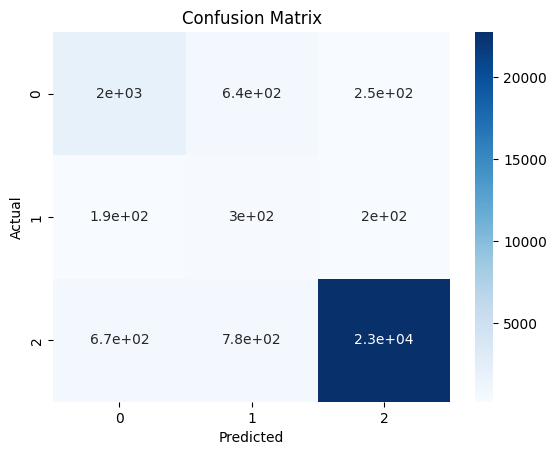

In [26]:
logistic_metrics = confusion_matrix(logistic_pred, y_test,labels=None, sample_weight=None, normalize=None)
sns.heatmap(logistic_metrics, annot=True,cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')